<font face='Calibri' size='2'> <i>eSBAE - Notebook Series - Part 5b, version 0.1, April 2023. Andreas Vollrath, UN-Food and Agricultural Organization, Rome</i>
</font>

![title](images/header.png)

# V-b - Supervised Subsampling (global data)
### Run a supervised classification based on Global data for training, and subsample by KMeans-Neyman stratification
-------


In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd
import numpy as np
from sampling_handler.misc import py_helpers
from sampling_handler.ensemble import classification as clf
from sampling_handler.ensemble import helpers as h
from matplotlib import pyplot as plt

/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.8/site-packages/bfast/__init__.py:10: UserWarning: cupy is not available in this environment, GPU fonctionnalities won't be available
  warn("cupy is not available in this environment, GPU fonctionnalities won't be available")


In [2]:
from sampling_handler import EnsembleClassification

ImportError: cannot import name 'EnsembleClassification' from 'sampling_handler' (/usr/local/share/jupyter/kernels/venv-eSBAE_notebooks/venv/lib/python3.8/site-packages/sampling_handler/__init__.py)

In [ ]:
esbae = EnsembleClassification(

    # your project name (NEEDS to be consistent with previous notebooks of your project)
    project_name = 'my_first_esbae_project',   
    
    
)

In [ ]:
start, end = 2015, 2020

In [ ]:
esbae.get_global_training(start, end, tmf=True, gain=True)

In [ ]:
esbae.class_probability(target='CNC', predictors=['change', 'reflectance'], outlier_removal=True, bayes_optimization=True)

In [ ]:
esbae.plot_probabilites(target='CNC')

In [ ]:
esbae.class_probability(target='FNF', predictors=['bands'], year=start, outlier_removal=True, bayes_optimization=True)
esbae.class_probability(target='FNF', predictors=['bands'], year=end, outlier_removal=True, bayes_optimization=True)

In [ ]:
esbae.probability_df['FNF_max'] = esbae.probability_df[[f'FNF_{start}', f'FNF_{end}']].max(axis=1)

In [ ]:
esbae.probability_df['combined'] = esbae.probability_df['FNF_max'] * esbae.probability_df['CNC'] 

In [ ]:
esbae.kmeans_neymann(strata=3, samples=5000)

In [ ]:
esbae.subsample(sampling_type='space_filling_curve')

#### the enxt cell needs to be replaced, i.e withoyur file and cols to classify might differ

In [3]:
# this is loading and merging my change and time-series dataframe
files = Path('/home/sepal-user/module_results/esbae/Gambela_MRV/04_Data_Augmentation/Landsat/').glob('*geojson')
files = [[str(file), False] for file in files]
result = py_helpers.run_in_parallel(
    py_helpers.geojson_to_gdf,
    files,
    workers=4,
    parallelization='processes'
)
cdf = pd.concat(result)

# define a start and end year
start_year = '2020'
end_year = '2022'



In [5]:
cdf.columns

Index(['geometry', 'point_id', 'dates', 'ts', 'images', 'mon_images',
       'bfast_change_date', 'bfast_magnitude', 'bfast_means',
       'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean',
       'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min',
       'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max',
       'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean',
       'ndfi_sd', 'ndfi_min', 'ndfi_max', 'bs_slope_mean', 'bs_slope_sd',
       'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change',
       'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change',
       'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change',
       'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect',
       'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min',
       'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20',
       'esa_lc21', 'esri_lc17', 'esri_lc18', 'esri_lc19', 'esri_lc20',

### Add "Ground Truth" from global products

In [6]:
# adds FNF and CNC column for later classifications
# takes Hansen by default for change between the start and end year
cdf = clf.add_global_target(
    cdf, start_year, end_year, 
    tmf=True,      # if True, and TMF shows a change
    gain=True      # if True, Hansen gain will be considered a change
)

In [7]:
cdf.columns

Index(['geometry', 'point_id', 'dates', 'ts', 'images', 'mon_images',
       'bfast_change_date', 'bfast_magnitude', 'bfast_means',
       'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean',
       'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min',
       'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max',
       'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean',
       'ndfi_sd', 'ndfi_min', 'ndfi_max', 'bs_slope_mean', 'bs_slope_sd',
       'bs_slope_max', 'bs_slope_min', 'ewma_jrc_date', 'ewma_jrc_change',
       'ewma_jrc_magnitude', 'mosum_jrc_date', 'mosum_jrc_change',
       'mosum_jrc_magnitude', 'cusum_jrc_date', 'cusum_jrc_change',
       'cusum_jrc_magnitude', 'ccdc_change_date', 'ccdc_magnitude', 'aspect',
       'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min',
       'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20',
       'esa_lc21', 'esri_lc17', 'esri_lc18', 'esri_lc19', 'esri_lc20',

In [19]:
np.unique(cdf.CNC, return_counts=True)

(array([0., 1.]), array([954,  14]))

### 4 add yearly fnf classification probability

In [12]:
def get_stats(row, band, start, end):
    
    idx = [start*10000 < int(d) < end*10000 for d in row.dates]
    ts = np.array(row.ts[band])[idx]
    
    return np.nanmean(ts), np.nanstd(ts)

bands = cdf.ts.head(1).values[0].keys()
for year in range(int(start_year), int(end_year)+1):
    print(year)
    if year == int(start_year) or year == int(end_year):
    #if year == int(end_year):
        to_class = cdf[[
            'point_id', 'elevation', 'slope', 'aspect', 'FNF'
        ]].copy()
        # prepare full dataframe for classification
        print('Calculating annual FNF classification probabilities')
        stats_list = []
        for band in bands:
            print(band)
            to_class[[f'{band}_{year}_mean', f'{band}_{year}_sd']] = cdf.apply(lambda row: get_stats(row, band, year, year+1), axis=1, result_type='expand')
            

        cdf[f'fnf_prob_{year}'] = clf.binary_probability_classification(to_class, 'FNF', outlier=True, bayes=True)    

2020
Calculating annual FNF classification probabilities
green
red
nir
swir1
swir2
ndfi
2021
2022
Calculating annual FNF classification probabilities
green
red
nir
swir1
swir2
ndfi


### Aggregate to maximum forest prob

In [13]:
cdf['fnf_max_prob'] = cdf[[
    f'fnf_prob_{start_year}', f'fnf_prob_{end_year}'
]].max(axis=1)

In [14]:
cdf['geometry'] = cdf.geometry.centroid

array([<Axes: title={'center': 'fnf_max_prob'}>], dtype=object)

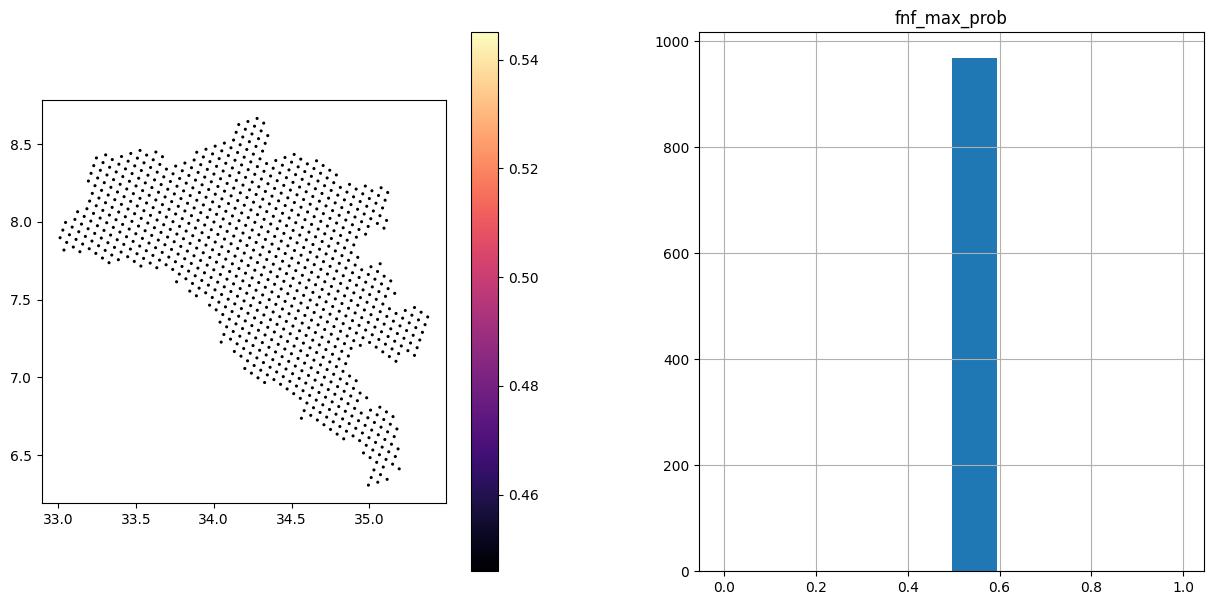

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

cdf.plot('fnf_max_prob', markersize=1.5, ax=ax[0], legend=True, cmap='magma')
cdf.hist('fnf_max_prob', ax=ax[1])

### Run change/no-change classification

In [48]:
# predictors used change/nochange classification
cols_to_classify = [
    'gfc_tc00', #'mon_images',
    'bfast_magnitude', #'bfast_means',
    'cusum_confidence', 'cusum_magnitude', 
    'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 
    #'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max',
    #'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max',
    #'nir_mean', 'nir_sd', 'nir_min', 'nir_max',
    #'red_mean', 'red_sd', 'red_min', 'red_max',
   
    'bs_slope_mean', 'bs_slope_sd',
    'bs_slope_max', 'bs_slope_min',
    #'ewma_jrc_date', 'ewma_jrc_change',
    'ewma_jrc_magnitude', #'mosum_jrc_change',
    'mosum_jrc_magnitude',#'cusum_jrc_change',
    'cusum_jrc_magnitude', 'ccdc_magnitude', #'aspect',
    #'dw_class_mode', 'dw_tree_prob__max', 
    'dw_tree_prob__min',
    #'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation',
    #'fnf_max_prob'
]

cdf['chg_prob'] = clf.binary_probability_classification(cdf, 'CNC', cols_to_classify, outlier=True)

array([<Axes: title={'center': 'chg_prob'}>], dtype=object)

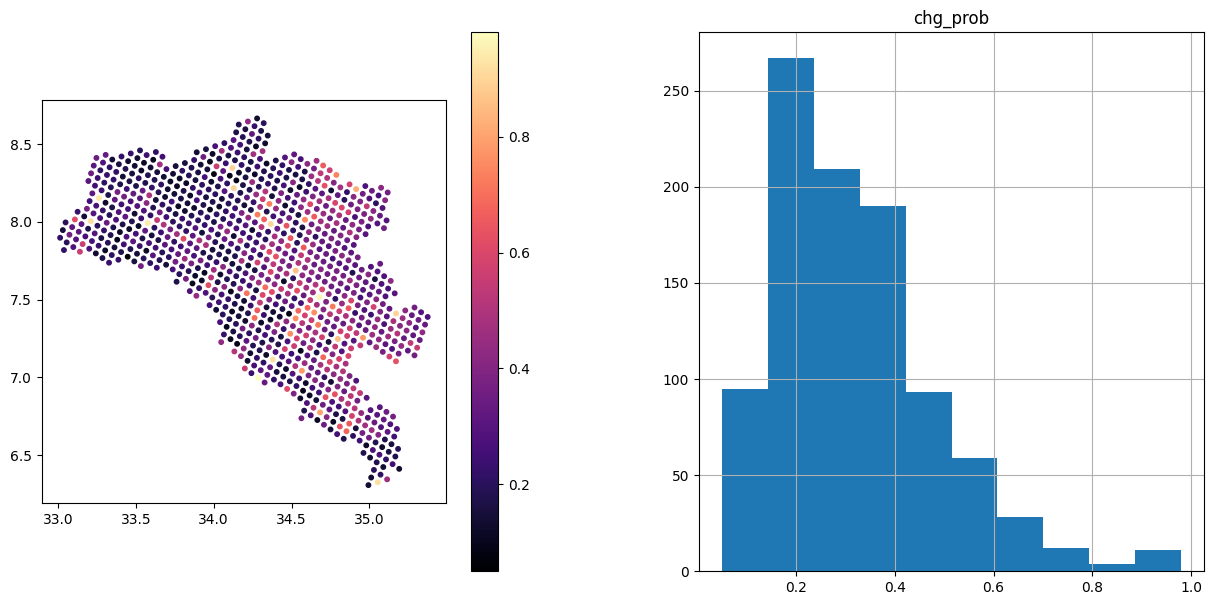

In [49]:
fig, ax = plt.subplots(1,2, figsize=(15,7))

cdf.plot('chg_prob', markersize=10.25, ax=ax[0], legend=True, cmap='magma')
cdf.hist('chg_prob', ax=ax[1])

### Combine probs from Change and Forest

In [12]:
def update(i, j):
    return np.sqrt(i*j)


In [13]:
for i in range(1, 10):
    print(i/10, update(i/10, 0.75), i/10*0.75)

0.1 0.2738612787525831 0.07500000000000001
0.2 0.3872983346207417 0.15000000000000002
0.3 0.4743416490252569 0.22499999999999998
0.4 0.5477225575051662 0.30000000000000004
0.5 0.6123724356957945 0.375
0.6 0.6708203932499369 0.44999999999999996
0.7 0.7245688373094719 0.5249999999999999
0.8 0.7745966692414834 0.6000000000000001
0.9 0.8215838362577492 0.675


In [14]:
cdf['simple_combined'] = cdf.apply(lambda row: update(row.fnf_max_prob, row.chg_prob), axis=1)
cdf['multiplied'] = cdf.fnf_max_prob * cdf.chg_prob

In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
def kmeans_stratifier(df, x, strata, sample_size):

    # add kmeans cluster result to df
    df['kmeans'] = KMeans(
        n_clusters=strata,
        n_init="auto"
    ).fit_predict(df[x].values.reshape(-1, 1))

    # prepare for
    sample_df = pd.DataFrame(
        [(
            i,
            len(df[df.kmeans == i]), 
            np.mean(df[x][df.kmeans == i]), 
            np.std(df[x][df.kmeans == i]),
            len(df[df.kmeans == i])*np.std(df[x][df.kmeans == i])
        )
            for i in df.kmeans.unique()], columns=['KMeans', 'Nh', 'mean', 'SD', 'div'])
    
    sample_df.sort_values('mean', inplace=True)
    sample_df['Strata'] = [i + 1 for i in range(len(sample_df))]
    sample_df[['neyman', 'proportional']] = sample_df.apply(lambda row: sample_allocation(
        sample_size,
        sample_df['div'].sum(),
        row.Nh,
        row.SD,
        len(df)
    ), axis=1, result_type='expand')

    return df, sample_df

def sample_allocation(n, div, Nh, SDh, N):

    neyman = np.multiply(n, np.divide(np.multiply(Nh,SDh), div))
    proportional = np.multiply(n, np.divide(Nh,N))
    return int(neyman), int(proportional)

### Stratify with Kmeans instead of Kozak and Neymann allocation

,KMeans,Nh,mean,SD,div,Strata,neyman,proportional
3,1,362,0.171243,0.036721,13.293115,1,34,37
1,4,301,0.299435,0.037532,11.297132,2,29,31
0,0,183,0.427486,0.038200,6.990637,3,18,18
2,3,95,0.580211,0.050367,4.784830,4,12,9
4,2,27,0.830741,0.086063,2.323704,5,6,2


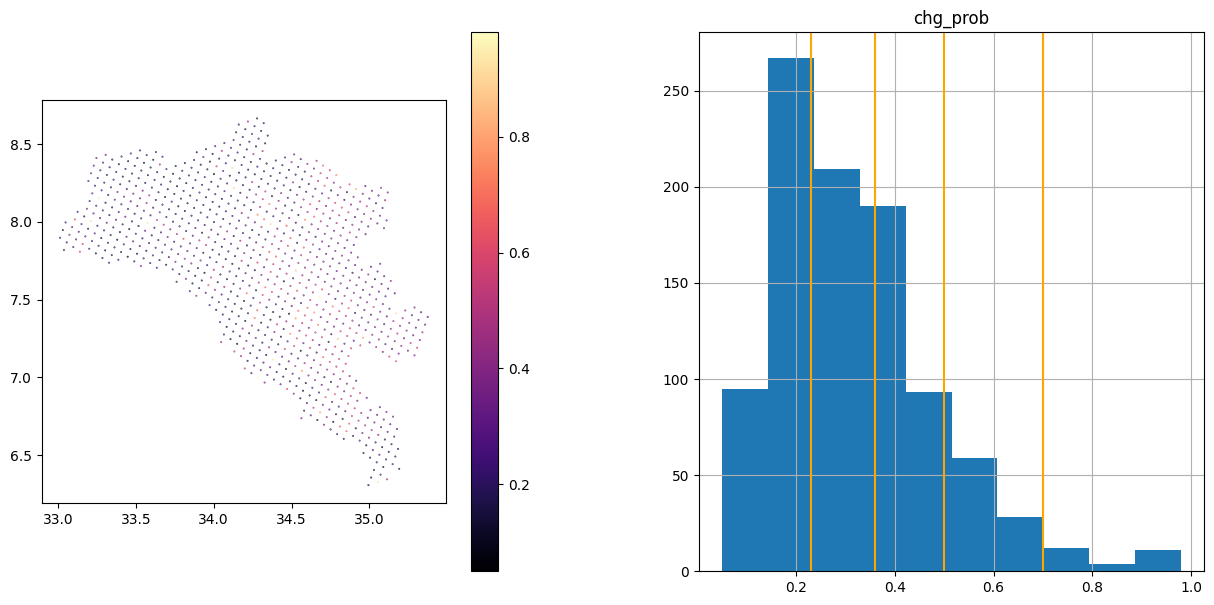

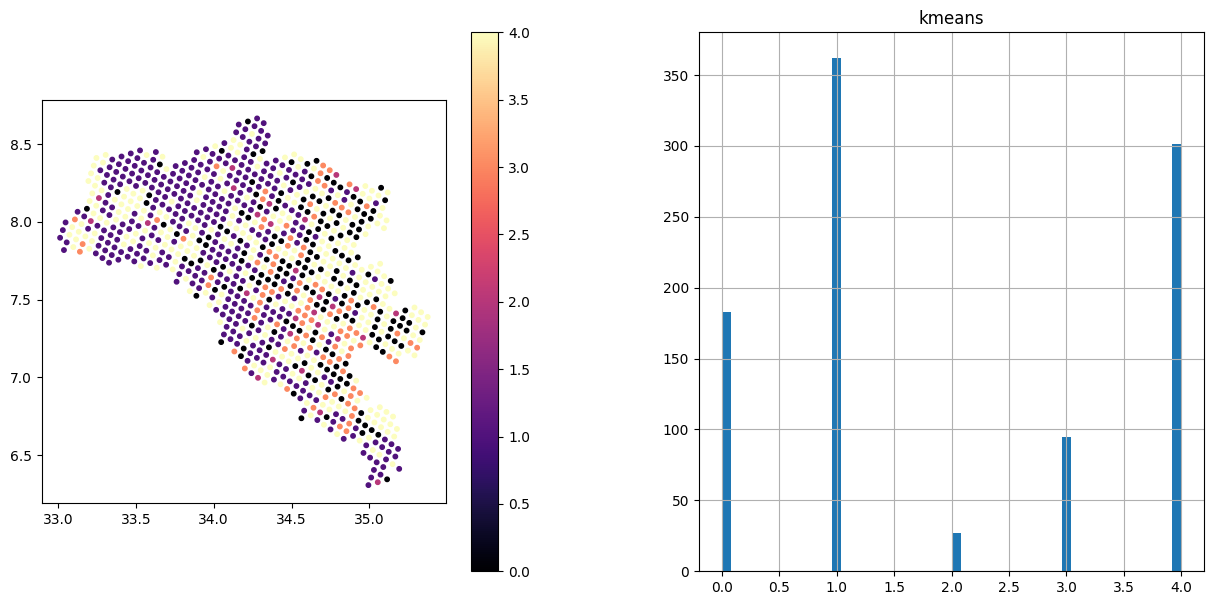

In [57]:
cdf, sample_df = kmeans_stratifier(cdf, 'chg_prob', strata=5, sample_size=100)
h.plot_cluster(cdf, prob_column='chg_prob', strata_column='kmeans')

fig, ax = plt.subplots(1,2, figsize=(15,7))

cdf.plot('kmeans', markersize=10.15, ax=ax[0], legend=True, cmap='magma')
cdf.hist('kmeans', ax=ax[1], bins=50)
sample_df

In [58]:
cdf, sample_df = h.kmeans_stratifier(cdf, 'simple_combined', strata=3, sample_size=5000)
h.plot_cluster(cdf, prob_column='simple_combined', strata_column='kmeans')

fig, ax = plt.subplots(1,2, figsize=(15,7))

cdf.plot('kmeans', markersize=0.15, ax=ax[0], legend=True, cmap='magma')
cdf.hist('kmeans', ax=ax[1])
sample_df

KeyError: 'simple_combined'

In [52]:
from sampling_handler.sampling import sfc

def select_with_space_filling_curve(cdf, sample_df, strata_column='kmeans'):
    dfs = []
    for stratum in cdf[strata_column].unique():
        dfs.append(sfc.sfc_subsample(
            gdf = cdf[cdf[strata_column] == stratum],
            target_point_size = sample_df.neyman[sample_df.KMeans == stratum].values[0]
        ))
        
    return pd.concat(dfs)

samples = select_with_space_filling_curve(cdf, sample_df) 

<Axes: >

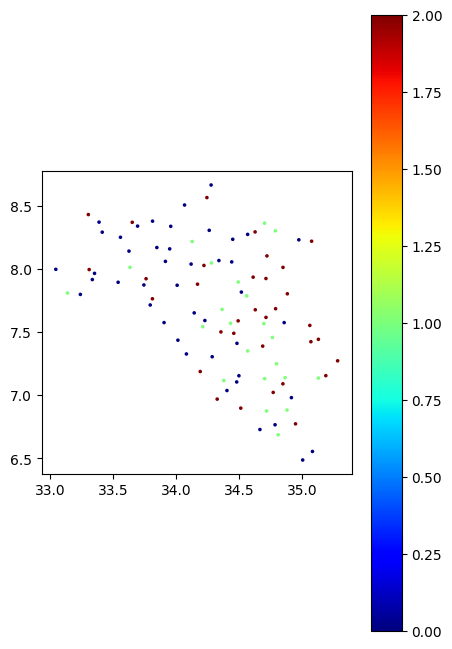

In [54]:
samples.plot('kmeans', markersize=2.5, cmap='jet', legend=True, figsize=(5,8))